#### Import some stuff

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


### Questions 1: plot the following functions by pyplot


The three functions given are:


$
a) y_{0}[n]=3cos(\frac{3\pi}{6}+\frac{\pi}{3})  \\
b) y_{1}[n]=sin(1.8\pi n)  \\
c) y_{2}[n]=cos(0.5n) \\
$

In [3]:
##Part abc

def f_1a(n):
    return 3*(np.cos(n*np.pi/6+np.pi/3))    #f1 = np.pi/12
def f_1b(n):
    return np.sin(1.8*np.pi*n)              #f2 = 0.9
def f_1c(n):
    return np.cos(0.5*n)                    #f3=1/(4*np.pi)  


Since for a sinusoid of general formula $y =A\cos(\omega x + \phi)$, the angular frequency is $\omega = 2\pi f_{0}$ 
The frequency $f_{0} = \frac{\omega}{2\pi}$


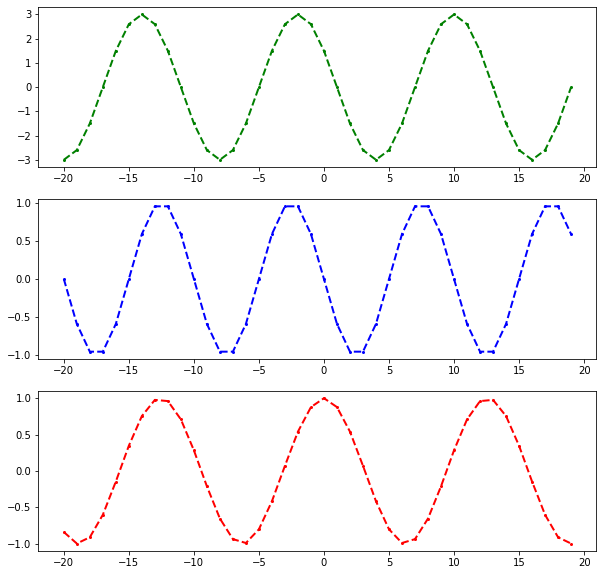

In [42]:
##Plotting 

t_1 = np.arange(-20.0, 20.0, 1)       #or linspace
plt.figure(1,figsize=(10,10))
plt.subplot(311)
plt.plot(t_1, f_1a(t_1), 'go--', linewidth=2, markersize=2)
plt.subplot(312)
plt.plot(t_1, f_1b(t_1), 'bo--', linewidth=2,markersize=2)
plt.subplot(313)
plt.plot(t_1, f_1c(t_1), 'ro--', linewidth=2,markersize=2)
plt.show()

In [45]:
##Part D

t_1e = np.arange(-10.0,10.0,0.001)
omega=1.8*np.pi
def f_1eDT(n):
    return np.sin(omega*t_1e)
def f_1eCT(x):
    return np.sin(omega*t_1e)

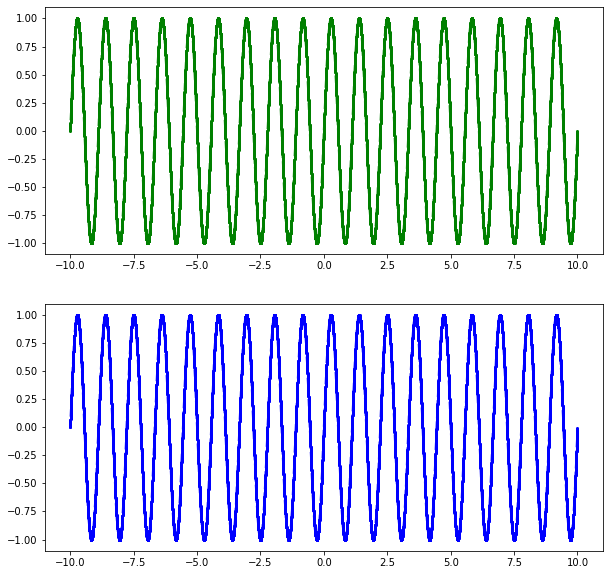

In [46]:
plt.figure(1,figsize=(10,10))
plt.subplot(211)
plt.plot(t_1e, f_1eDT(t_1), 'go--', linewidth=2, markersize=2)
plt.subplot(212)
plt.plot(t_1e, f_1eCT(t_1), 'bo--', linewidth=2,markersize=2)

plt.show()

In [ ]:
##CoMmEnT oN tHe DiFfeReNcE

"""
With plotting of 1000Hz, there wont be any difference to our eyes as there are 1000*20 data points 
within out little screen 
"""

f) Angular frequency ω (in radians per second), is larger than frequency ν (in cycles per second, also called Hz), by a factor of 2π

In [53]:
## part g

def f_1g(n,omega,phi):
    return 3*np.cos(omega*n+phi)
#
#  cos(w+p)=coswcosp -sinwsinp
#
def f_1g_expanded(n,omega,phi):
    return 3*np.cos(omega*n)*np.cos(phi) - 3*np.sin(omega*n)*np.sin(phi)

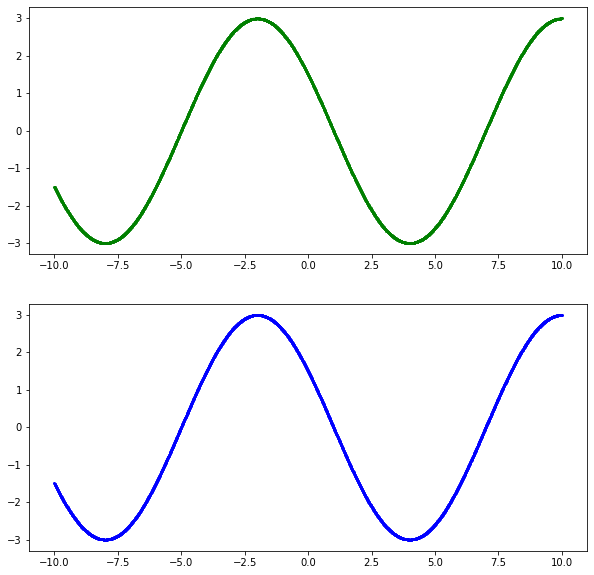

In [54]:
t_1g = np.arange(-10,10,0.01)
omega_1g = np.pi/6
phi_1g = np.pi/3

plt.figure(1,figsize=(10,10))
plt.subplot(211)
plt.plot(t_1g, f_1g(t_1g,omega_1g,phi_1g), 'go--', linewidth=2, markersize=2)
plt.subplot(212)
plt.plot(t_1g, f_1g_expanded(t_1g,omega_1g,phi_1g), 'bo--', linewidth=2,markersize=2)

plt.show()

### Q2 & 3. Energy & Power

In [66]:
def q2_energy(N):
    sum_ = 0
    n = 0
    while n < N:
        sum_ += 1/(np.abs(np.power(2,n))**2)
        n += 1
    return sum_

In [72]:
E = q2_energy(16)
print(E)

1.3333333330228925


For 
$
x[n] = \left\{
    \begin{array}\\
        2^{-n}, &  n \geq 0  \\
        0, & n < 0
     \end{array}
\right.
$

Formula for energy of the sequence is then :$$E = \sum_{j=-\infty}^{+\infty} |x[j]|^2$$

In this case:
$$
E = E = \sum_{j=-\infty}^{+\infty} |2^j|^2 = \sum_{j=-\infty}^{+\infty}|4^j| \\
E = \frac{1}{4^0} + \frac{1}{4^1} + \frac{1}{4^2}+... \\
E = \frac{a}{1-r} = \frac{1}{1-0.25} = 4/3 \\
$$

In [76]:
def q3_avgpower(N):
    sum_ = 0
    n = 0
    while n < N:
        sum_ += 1/1
        n += 1
    return sum_/N

In [77]:
P = q3_avgpower(10)
print(P)

1.0


For unit step sequence
$
x[n] = \left\{
    \begin{array}\\
        1, &  n \geq 0  \\
        0, & n < 0
     \end{array}
\right.
$

 Well, it's always 1 over any time point T so it's average power is 1^2 = 1

### Q4

u(n) is  _|&#8254;           
u(n-1) is _|&#8254; shifted 1  to the left  
u(n) - u(n-1) yield a single spike at 0    
2\*( u(n-1) - u(n-2)  ) yields a peak of 2 at x =1     
3\*( u(n-2) - u(n-3) ) yields a peak of 2 at x = 2   


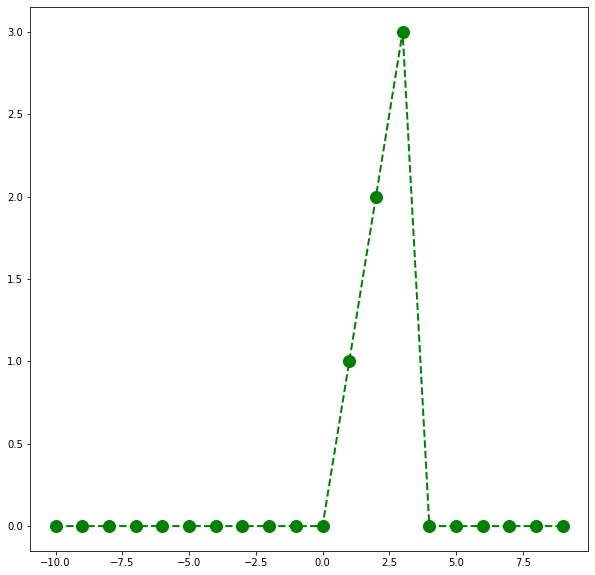

In [8]:

def q5(t):
    def u(n):
        return np.heaviside(n, 0)  #prevent u from being overwritten elsewhere
    return u(t)-u(t-1)+2*(u(t-1) - u(t-2)) + 3*(u(t-2)-u(t-3))

t_5 = np.arange(-10,10,1)

plt.figure(1,figsize=(10,10))
plt.subplot(111)
plt.plot(t_5, q5(t_5), 'go--', linewidth=2, markersize=12)


plt.show()

### Q5

(a)
$y = x[n^2]$ 
easily not a linear because for any input step it transform that input into the value of that input at $n^2$ timeframe of the future. **Definitely not linear**

(b)
$y = x^2[n]$ 
This system squares the input _which is already not linear it's quadratic_  
Proof: 
input: $x_{1}[n]$ and $x_{2}[n]$
combined output: $(ax_{1}[n]+bx_{2}[n])^2$
sum of scaled output from each input: $a^2x_{1}^2[n]+b^2x_{2}^2[n]$  

(c)
y = $\sum_{k=-\infty}^{n} x[k]$ 

This system sums every input from -$\infty$ to point n in time. Doesn't look like it's linear because it's accumulative   

Proof: 
input: $x_{1}[n]$ and $x_{2}[n]$  

combined output: $\sum_{k=-\infty}^{n}(ax_{1}[n]+bx_{2}[n])$

sum of scaled output from each input: $\sum_{k=-\infty}^{n}(ax_{1}[n]) + \sum_{k=-\infty}^{n}(bx_{2}[n])$

We can tell that the combined output has more number of data points for computation, while the sum of scaled output will duplicate some data points. Thus they are not **linear**

### Q6

(a)
y = $\sum_{k=-\infty}^{n} x[k]$ 

Is it time-invariant? f(x[n]) = y[n] implies f(x[n-K]) = y[n-K] 

output of delayed input: $\sum_{k=-\infty}^{n-K} x[k]$ 

delayed output: $\sum_{k=-\infty}^{n} x[k-K]$ 

Using the summation series, we know the time point used for both summation is x[$-\infty$],... x[-3], x[-2], x[-1] ,....x[n-K] 

We can see that _delayed infinity is still inifinity_ , and hence it is indeed time-invariant

(b) y[n] = $x^2$[n]-x[n-1]x[n+1]

Is this thing time invariant? 

output of delayed input x[n-K]: $x^2$[n-K]-x[n-K-1]x[n-K+1]

delayed output y[n-K]: $x^2$[n-K]-x[n-K-1]x[n-K+1] (_notice that y[n] don't have any independent n term from x -- nx[n]_ )

Thus this thing is time invariant

### Q7 BIBO stability 

_BIBO STABLE if and only if its impulse response sequence {h[n]} is absolutely summable_


(a) $y[n]=\sum_{k=-\infty}^{n} x[k]$ 

Ah this thing again...

Since y[n]= x[n] conv h[n], and | x[n]| < $B_{x}$ < $\infty$ for all n (bounded input), then:

|y[n]|= $| \sum_{k=-\infty}^{n} x[k] | = $



(b) Do yourself la hor idk yet

### Q8

In [16]:
def y_q8(x,n):
    return 2*x[n]+x[n-1]-x[n-3]

x_all = np.array([.0,.0,.0,.0,.0,.0,.0,1.,.0,.0,.0,.0])
x = x_all[3:]
y = np.array([y_q8(x_all,n)for n in range(3,len(x_all),1)])
print(x)
print(y)
output = np.convolve(x,y)
print(output)

[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[ 0.  0.  0.  0.  2.  1.  0. -1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0. -1.  0.  0.  0.  0.  0.]


Bye 8 and 9 see ya later